In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [48, 48]

train_path = './archivetest2/train/'
valid_path = './archivetest2/test/'

In [6]:
inception = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 23s 0us/step


In [7]:
for layer in inception.layers:
    layer.trainable = False

In [8]:
folders = glob('./archivetest2/train/*')

In [9]:
folders

['./archivetest2/train\\angry',
 './archivetest2/train\\disgusted',
 './archivetest2/train\\fearful',
 './archivetest2/train\\happy',
 './archivetest2/train\\neutral',
 './archivetest2/train\\sad',
 './archivetest2/train\\surprised']

In [10]:
x = Flatten()(inception.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [15]:
training_set = train_datagen.flow_from_directory('./archive/train/',
                                                 target_size = (48, 48),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 28709 images belonging to 7 classes.


In [16]:
test_set = test_datagen.flow_from_directory('./archive/test/',
                                            target_size = (48, 48),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 7178 images belonging to 7 classes.


In [17]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10


C:\Users\USER\AppData\Local\Temp\ipykernel_25276\177326590.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


1795/1795 [==============================] - 136s 75ms/step - loss: 1.6799 - accuracy: 0.3312 - val_loss: 1.5970 - val_accuracy: 0.3704
Epoch 2/10
1795/1795 [==============================] - 129s 72ms/step - loss: 1.6152 - accuracy: 0.3665 - val_loss: 1.5771 - val_accuracy: 0.3780
Epoch 3/10
1795/1795 [==============================] - 131s 73ms/step - loss: 1.5962 - accuracy: 0.3786 - val_loss: 1.5751 - val_accuracy: 0.3874
Epoch 4/10
1795/1795 [==============================] - 128s 71ms/step - loss: 1.5828 - accuracy: 0.3827 - val_loss: 1.5495 - val_accuracy: 0.4092
Epoch 5/10
1795/1795 [==============================] - 125s 70ms/step - loss: 1.5759 - accuracy: 0.3869 - val_loss: 1.5485 - val_accuracy: 0.4046
Epoch 6/10
1795/1795 [==============================] - 128s 71ms/step - loss: 1.5675 - accuracy: 0.3891 - val_loss: 1.5690 - val_accuracy: 0.3911
Epoch 7/10
1795/1795 [==============================] - 135s 75ms/step - loss: 1.5639 - accuracy: 0.3921 - val_loss: 1.5496 - val

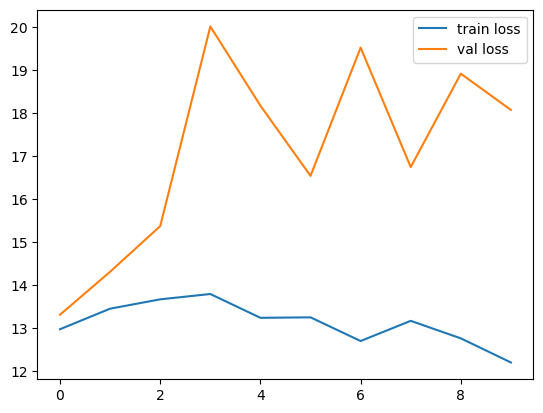

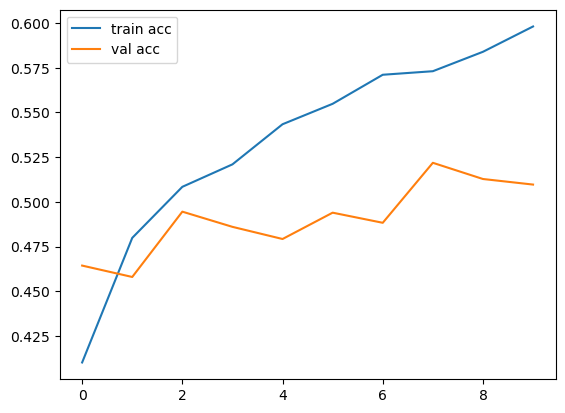

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')